# Solar phase curve on Pluto bladed units from LORRI images

In [43]:
import numpy as np
import matplotlib.pyplot as plt

from ssi import LORRI
from ssi.geol import PLUTO

## Hillier et al. 2020 equations

In [44]:
A = 0.7  # Buratti et al. 2017 #~1 for Sputnik Planitia #0.7 for Pluto 0.08 for Cthulu regio

def f(i_f, inc, emi):
    """"Hillier et al. 2020 - Eq. 1"""
    mu_0, mu = np.cos(np.radians(inc)), np.cos(np.radians(emi))
    return (i_f - (1 - A) * mu_0) * (mu_0 + mu) / (A * mu_0)

In [45]:
p = 0.62  # Buratti & Veverka 1983

f_alpha_0 = 2 / A * (p - 2/3 * (1 - A))  # Hillier et al. 2020 - Eq. 3

In [46]:
def phi(i_f, inc, emi, phase):
    """"Hillier et al. 2020 - Eq. 2"""
    alpha, f_alpha = np.radians(phase), f(i_f, inc, emi)
    return (2 / 3 * (1 - A) * (np.sin(alpha) + (np.pi - alpha) * np.cos(alpha))
            + A * f_alpha * np.pi / 2 * (1 - np.sin(alpha / 2)) * np.tan(alpha / 2)
            * np.log(1 / np.tan(alpha / 4))) / np.pi * (2 / 3 * (1 - A) + A * f_alpha_0 / 2)

In [47]:
def magnitude(i_f, inc, emi, phase):
    return -2.5 * np.log10(phi(i_f, inc, emi, phase))

## Load LORRI data

In [48]:
img = LORRI('lor_0299148263_0x630_sci.pho.cub',offset_l=-18, offset_s=10)
#img = LORRI('lor_0299147337_0x636_sci.pho.cub') #no blded regions
#img = LORRI('lor_0298992789_0x636_sci.pho.cub',offset_l=0, offset_s=15)
#img = LORRI('lor_0299067359_0x636_sci.pho.cub',offset_l=-3, offset_s=3)
#img = LORRI('lor_0299176871_0x636_sci.pho.cub') #too zoomed in


img_geol = PLUTO(img, legend=False)

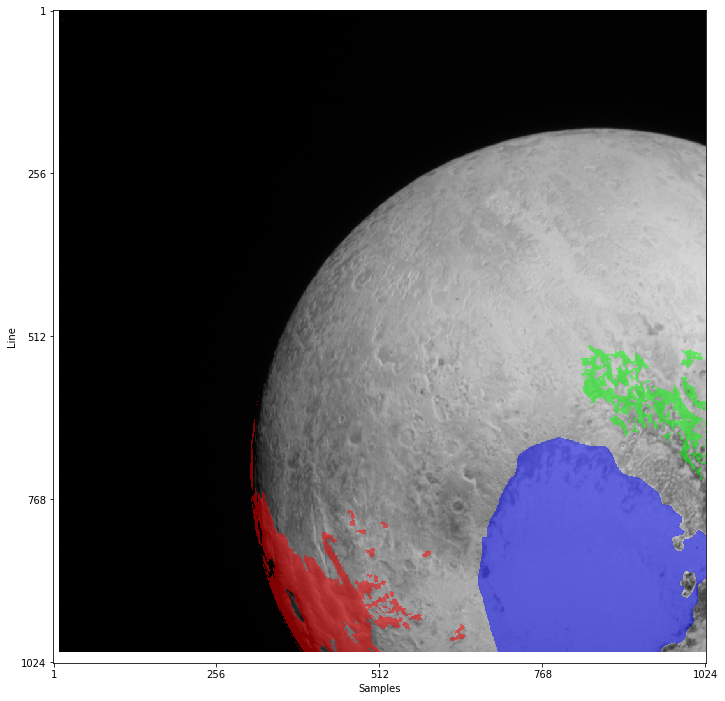

In [49]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.imshow(img.data, extent=img.extent, vmin=0, vmax=1, cmap='gray')#, origin='lower')
ax.imshow(img_geol, cmap=PLUTO.CMAP, extent=img.extent, alpha=.5)#, origin='lower')

ax.set_xlabel('Samples')
ax.set_ylabel('Line')
ax.set_xticks(img.sticks)
ax.set_yticks(img.lticks);

In [50]:
units_geol = PLUTO(img)

mask_inc_75 = np.less(img.inc, 75, where=img.ground)
mask_emi_75 = np.less(img.emi, 75, where=img.ground)

mask_bladed_units = (units_geol == 'Bladed units') & mask_inc_75 & mask_emi_75
#mask_sputnik_planitia = (units_geol == 'Sputnik Planitia') & mask_inc_75 & mask_emi_75
#mask_wb_units = (units_geol == 'Washboard units') & mask_inc_75 & mask_emi_75

In [54]:
i_f = img.data[mask_bladed_units]
inc = img.inc[mask_bladed_units]
emi = img.emi[mask_bladed_units]
phase = img.phase[mask_bladed_units]

In [55]:
#i_f = img.data[mask_wb_units]
#inc = img.inc[mask_wb_units]
#emi = img.emi[mask_wb_units]
#phase = img.phase[mask_wb_units]

In [56]:
#i_f = img.data[mask_sputnik_planitia]
#inc = img.inc[mask_sputnik_planitia]
#emi = img.emi[mask_sputnik_planitia]
#phase = img.phase[mask_sputnik_planitia]

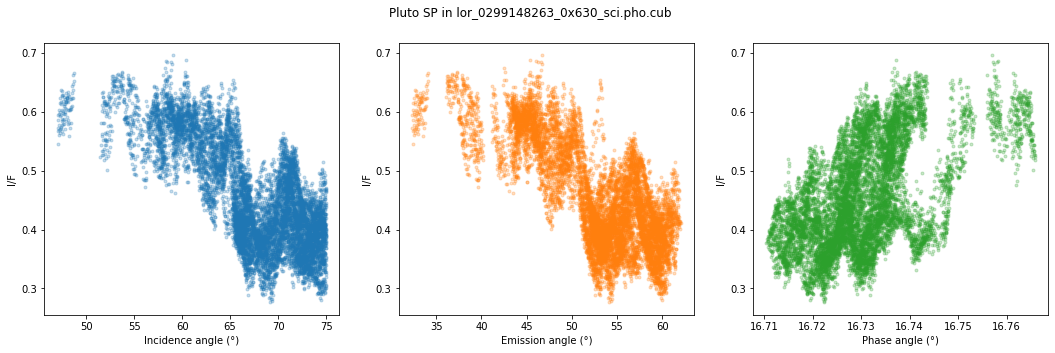

In [57]:
_, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(18, 5))

ax0.plot(inc, i_f, '.', color='tab:blue', alpha=.25)
ax1.plot(emi, i_f, '.', color='tab:orange', alpha=.25)
ax2.plot(phase, i_f, '.', color='tab:green', alpha=.25)

ax0.set_xlabel('Incidence angle (°)')
ax0.set_ylabel('I/F')

ax1.set_xlabel('Emission angle (°)')
ax1.set_ylabel('I/F')

ax2.set_xlabel('Phase angle (°)')
ax2.set_ylabel('I/F')

plt.suptitle(f'Pluto SP in {img.filename}');

In [58]:
f_alpha = f(i_f, inc, emi)
phi_alpha = phi(i_f, inc, emi, phase)
mag_alpha = magnitude(i_f, inc, emi, phase)

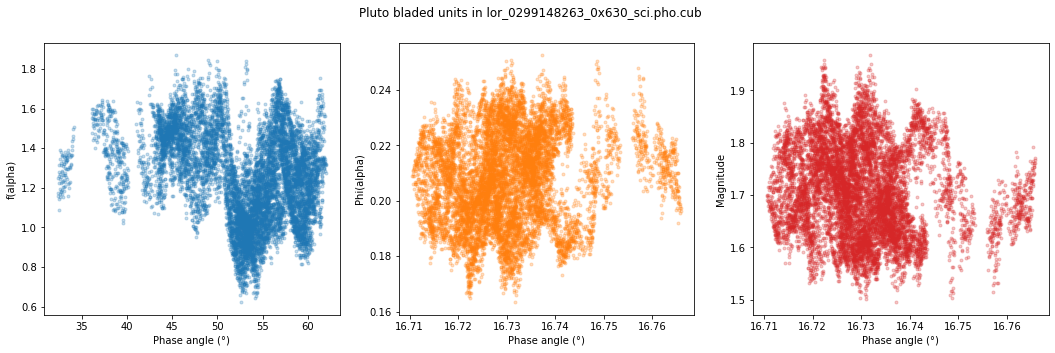

In [59]:
_, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(18, 5))

ax0.plot(emi, f_alpha, '.', color='tab:blue', alpha=.25)
ax1.plot(phase, phi_alpha, '.', color='tab:orange', alpha=.25)
ax2.plot(phase, mag_alpha, '.', color='tab:red', alpha=.25)

ax0.set_xlabel('Phase angle (°)')
ax0.set_ylabel('f(alpha)')

ax1.set_xlabel('Phase angle (°)')
ax1.set_ylabel('Phi(alpha)')

ax2.set_xlabel('Phase angle (°)')
ax2.set_ylabel('Magnitude')

plt.suptitle(f'Pluto bladed units in {img.filename}');

## Compare to the phase curve from Hillier et al. Fig 2.

In [60]:
np.mean(f_alpha), np.std(f_alpha), np.median(f_alpha)#, np.max(f_alpha), np.mean(phase)

(1.2478141367330076, 0.22768021776842823, 1.2530642037826745)

In [61]:
np.mean(inc), np.std(inc), np.median(inc), np.max(inc), np.min(inc)

(67.13116727588032,
 5.638322306109822,
 67.94546508789062,
 74.99908447265625,
 47.01382064819336)

In [62]:
np.mean(emi), np.std(emi), np.median(emi), np.max(emi), np.min(emi)

(52.66788380989803,
 5.876378426935108,
 53.66257095336914,
 62.0443115234375,
 32.303958892822266)

In [18]:
np.mean(phase), np.std(phase), np.median(phase)

(nan, nan, nan)

In [19]:
phase_hillier, mag_hillier = np.loadtxt('SolarPhaseCurvePluto_V4.txt', unpack=True)

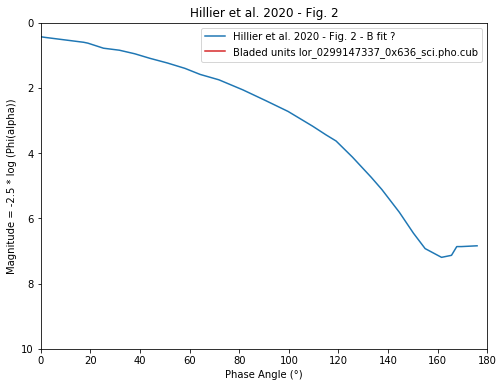

In [20]:
_, ax = plt.subplots(figsize=(8, 6))

ax.plot(phase_hillier, mag_hillier, '-', color='tab:blue', label='Hillier et al. 2020 - Fig. 2 - B fit ?')
ax.plot(phase, mag_alpha, '-', color='tab:red', label=f'Bladed units {img.filename}')

ax.legend()

ax.set_xlim(0, 180)
ax.set_ylim(10, 0)

ax.set_xlabel('Phase Angle (°)')
ax.set_ylabel('Magnitude = -2.5 * log (Phi(alpha))')
ax.set_title('Hillier et al. 2020 - Fig. 2');

In [21]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

In [22]:
X = inc
Y = emi
Z = i_f

ValueError: Argument Z must be 2-dimensional.

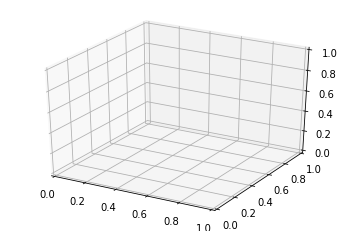

In [23]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)#, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_title('surface');

TypeError: Input z must be a 2D array.

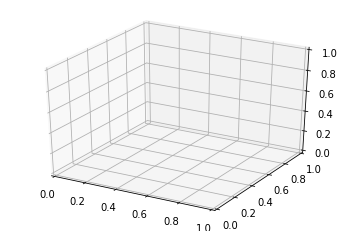

In [24]:





fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D contour')
plt.show()